In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'data/train.csv')
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,19.376997,1.600264,45.000000,no,no,3.000000,3.000000,Frequently,no,2.949419,yes,1.295697,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
1,Male,22.088059,1.803132,106.329569,yes,yes,2.348745,3.000000,Sometimes,no,2.096751,no,0.544564,0.676880,Sometimes,Public_Transportation,Obesity_Type_I
2,Male,26.844812,1.691510,102.595180,yes,yes,2.680375,1.089048,Sometimes,no,1.366238,no,0.181324,1.041677,no,Public_Transportation,Obesity_Type_II
3,Female,19.758286,1.667404,49.125955,no,no,2.880792,3.281391,Sometimes,no,1.960131,no,1.513029,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
4,Male,23.170309,1.707557,75.306702,yes,yes,2.303367,3.042774,Sometimes,no,1.277636,no,0.944982,0.366126,Sometimes,Public_Transportation,Overweight_Level_I
5,Male,25.314589,1.787802,115.127662,yes,yes,1.588114,3.000000,Sometimes,no,2.115967,no,1.541072,0.000000,no,Automobile,Obesity_Type_II
6,Male,24.582200,1.769933,117.708705,yes,yes,1.475906,2.999346,Sometimes,no,2.019430,no,1.046878,0.460866,Sometimes,Public_Transportation,Obesity_Type_II
7,Male,20.000000,1.800000,114.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Obesity_Type_II
8,Female,26.000000,1.633887,111.878132,yes,yes,3.000000,3.000000,Sometimes,no,2.621976,no,0.000000,0.123861,Sometimes,Public_Transportation,Obesity_Type_III
9,Female,20.000000,1.625236,74.433362,yes,no,2.522399,1.032887,Sometimes,no,2.397653,no,2.358699,0.440087,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Create a label encoder object
le = LabelEncoder()

# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder on each of the categorical columns:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"{col} mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Gender mapping: {'Female': 0, 'Male': 1}
family_history_with_overweight mapping: {'no': 0, 'yes': 1}
FAVC mapping: {'no': 0, 'yes': 1}
CAEC mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE mapping: {'no': 0, 'yes': 1}
SCC mapping: {'no': 0, 'yes': 1}
CALC mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
MTRANS mapping: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
NObeyesdad mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,19.376997,1.600264,45.000000,0,0,3.000000,3.000000,1,0,2.949419,1,1.295697,0.000000,2,3,0
1,1,22.088059,1.803132,106.329569,1,1,2.348745,3.000000,2,0,2.096751,0,0.544564,0.676880,2,3,2
2,1,26.844812,1.691510,102.595180,1,1,2.680375,1.089048,2,0,1.366238,0,0.181324,1.041677,3,3,3
3,0,19.758286,1.667404,49.125955,0,0,2.880792,3.281391,2,0,1.960131,0,1.513029,1.000000,2,3,0
4,1,23.170309,1.707557,75.306702,1,1,2.303367,3.042774,2,0,1.277636,0,0.944982,0.366126,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,1,32.290160,1.754956,120.098812,1,1,2.967300,3.000000,2,0,2.530035,0,0.955317,1.339232,2,0,3
1895,1,23.000000,1.718981,81.669950,1,1,2.000000,1.729553,2,0,1.400247,0,0.887923,1.011983,2,3,6
1896,0,22.989846,1.650000,80.000000,1,1,2.000000,3.000000,2,0,2.000000,0,0.146919,2.000000,3,3,6
1897,0,23.000000,1.628168,84.497980,1,1,2.058687,2.962004,2,0,2.010596,0,0.851059,0.630866,3,3,2


In [5]:
df['NObeyesdad'].value_counts()

NObeyesdad
2    313
4    294
6    269
5    268
3    262
1    252
0    241
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the models and parameters
classifiers = {
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [1, 5, 10, 15, 20], 'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random']}),
    'LogisticRegression': (LogisticRegression(max_iter=300), {'C': [0.1, 1, 5, 10]}),
    'SVM': (SVC(), {'C': [0.1, 1, 5, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'poly', 'rbf', 'sigmoid']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [1, 5, 10, 15, 20], 'criterion': ['gini', 'entropy', 'log_loss']}),
    'XGBoost': (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'MLPClassifier': (MLPClassifier(alpha=0.01), {'hidden_layer_sizes': [(64,), (128,)], 'solver': ['adam', 'sgd'], 'learning_rate_init': [0.0025, 0.0050], 'max_iter': [100, 150, 200], 'batch_size': [20, 40, 60, 80], 'activation': ['relu', 'tanh']})
}

# Apply GridSearchCV to each classifier
for name, (model, params) in classifiers.items():
    gs = GridSearchCV(model, params, cv=5)
    gs.fit(X_train, y_train)
    print(f"Best parameters for {name}: {gs.best_params_}")
    print(f"Best score for {name}: {gs.best_score_}")
    print(f"Test score for {name}: {gs.score(X_test, y_test)}")

## Building and training the model:

In [24]:
# Create a new XGBClassifier with the best parameters
model = XGBClassifier(learning_rate=0.2, n_estimators=50)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate the recall
recall = recall_score(y_test, y_pred, average='macro')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.9736842105263158
Precision: 0.971735139880659
Recall: 0.9726261355063394
F1 Score: 0.9719916397520992
AUC-ROC: 0.99898915470224


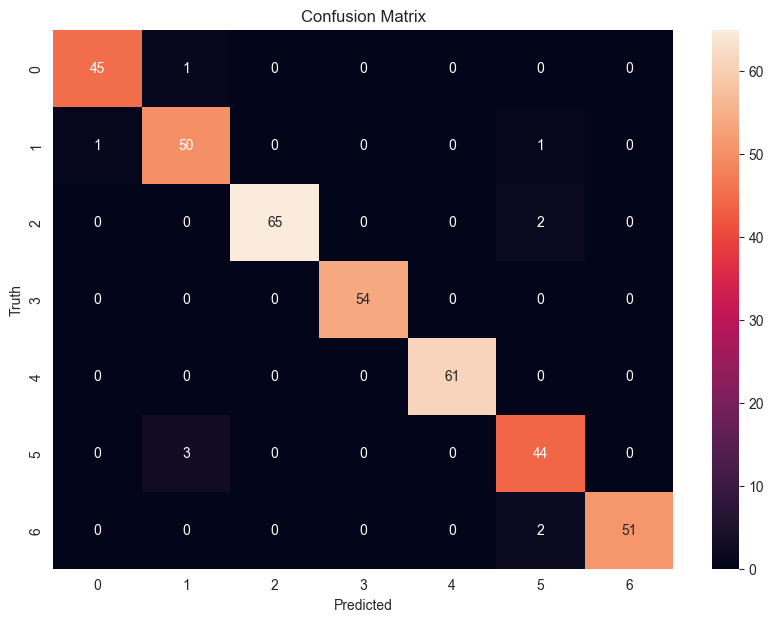

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
n=pd.DataFrame([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'])

In [71]:
n

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [84]:
prediction = model.predict(n)
le.classes_[prediction]

array(['Insufficient_Weight'], dtype=object)